In [5]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.font_manager import FontProperties
# import seaborn as sns
from datetime import datetime as dt
import warnings
warnings.filterwarnings("ignore")
from myutils.process_utils import process_linedf, post_process, process_timetable
from myutils.analysis_utils import load_daydf, load_routinedf, map_plot,\
                                    generate_intime, load_test_daydf,\
                                    generate_test_intime


清理并透视原始数据

In [2]:
for date in [
            '06',
            # '07',
            # '08',
            # '09',
            # '10'
            ]:
    up_res = pd.DataFrame()
    down_res = pd.DataFrame()
    # gps = load_daydf(int(date))
    gps = load_test_daydf(int(date))
    for nidx in gps.nidx.unique():
        print(nidx)
        for direction in [0, 1]:
            routine = load_routinedf(gps, nidx, direction)
            # if direction == 0:
            #     if ''routine['station_status'][0]
            routine = post_process(routine, date=int(date))
            routine = routine[['vid','time','direction','nidx', 
                                'deadheading','cum_length', 'velocity','station_status']]
            base_data = routine.drop('time', axis = 1).groupby(['nidx','direction','station_status']).agg('mean')
            time_data = routine.groupby(['nidx','direction','station_status'])['time'].agg(['min','max'])
            routine = pd.merge(base_data, time_data,left_index=True, right_index=True).sort_values('max').reset_index()
            if direction == 0:
                up_res = pd.concat([up_res, routine], ignore_index=True).reset_index(drop = True)
            else:
                down_res = pd.concat([down_res, routine], ignore_index=True).reset_index(drop = True)
    # up_res.to_pickle('./data/analysis/'+'truetime_up_09'+date+'.pkl')
    # down_res.to_pickle('./data/analysis/'+'truetime_down_09'+date+'.pkl')
    up_res.to_pickle('./data/testanalysis/'+'truetime_up_09'+date+'.pkl')
    down_res.to_pickle('./data/testanalysis/'+'truetime_down_09'+date+'.pkl')

0
1
2
3
4
5
6
7
8
9
10
11
12
101
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
102
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
103
94


In [ ]:
# ass = pd.read_pickle('./data/analysis/as_6.pkl')
# base_data = ass.drop('time', axis = 1).groupby(['nidx','direction','station_status']).agg('mean')
# time_data = ass.groupby(['nidx','direction','station_status'])['time'].agg(['min','max'])
# ass = pd.merge(base_data, time_data,left_index=True, right_index=True)
# ass.reset_index()
# # ass.groupby()
# ass.groupby()


In [ ]:
# new_ass = pd.read_pickle('./data/analysis/truetime_up_0906.pkl')
# new_ass.set_index(['station_status']).loc['菊园车站']

0.0

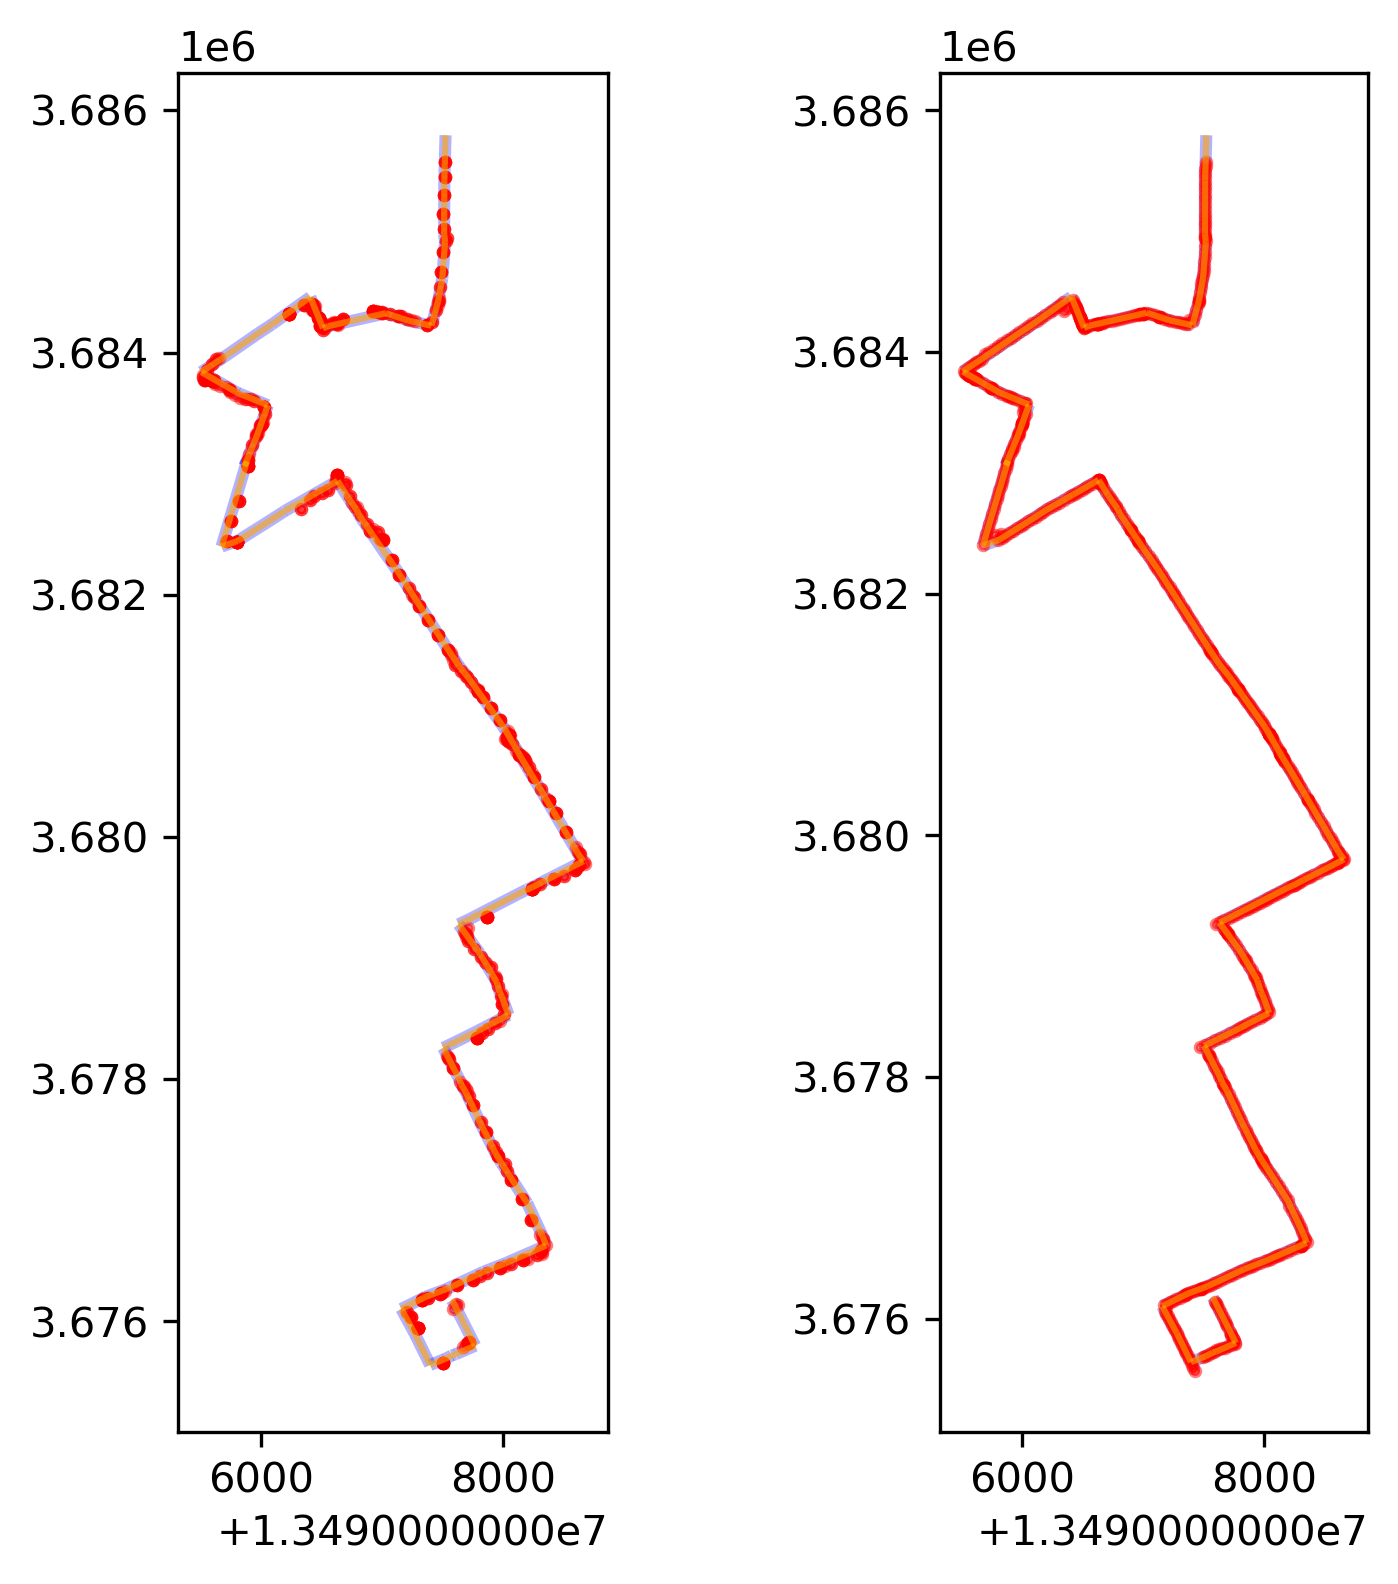

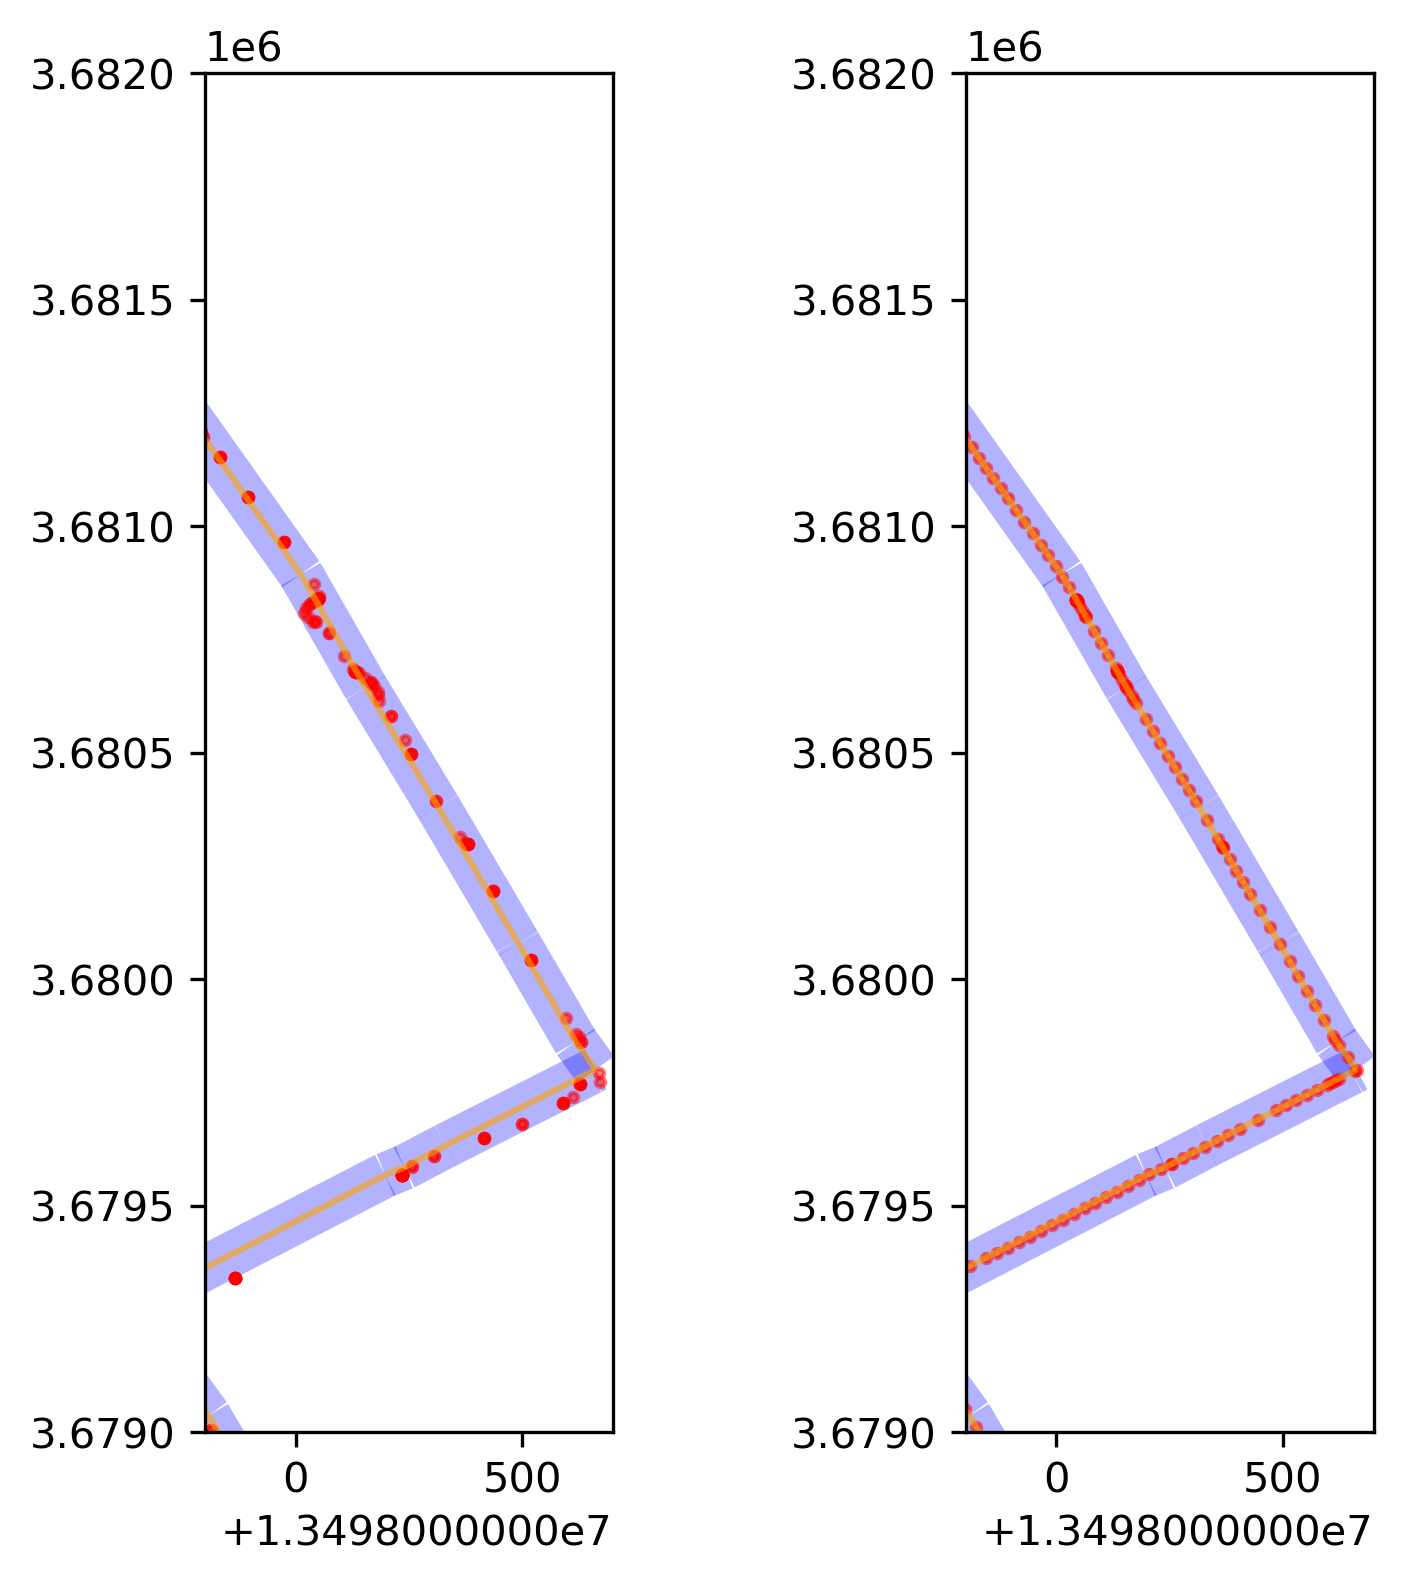

In [6]:
date = 6
nidx = 0
direction = 1
day = load_daydf(date)
routine = load_routinedf(day, nidx, direction)
mapline = process_linedf(direction)
xlim = (7800+1.349e7, 8700+1.349e7)
ylim = (3.679e6, 3.682e6)
map_plot(mapline, routine)
map_plot(mapline, routine, xlim, ylim)

station_time_res = routine.loc[routine['station_status'] != 0, ['time','cum_length', 'station_status']].groupby('station_status').agg('mean').sort_values('time')
len(station_time_res)
day.cum_length.min()


In [ ]:

routine = load_routinedf(day, 14, 0)
routine.loc[routine['station_status']=='菊园车站']
# .cum_length.min()

2021-09-06 17:54:14 2021-09-07 22:53:58


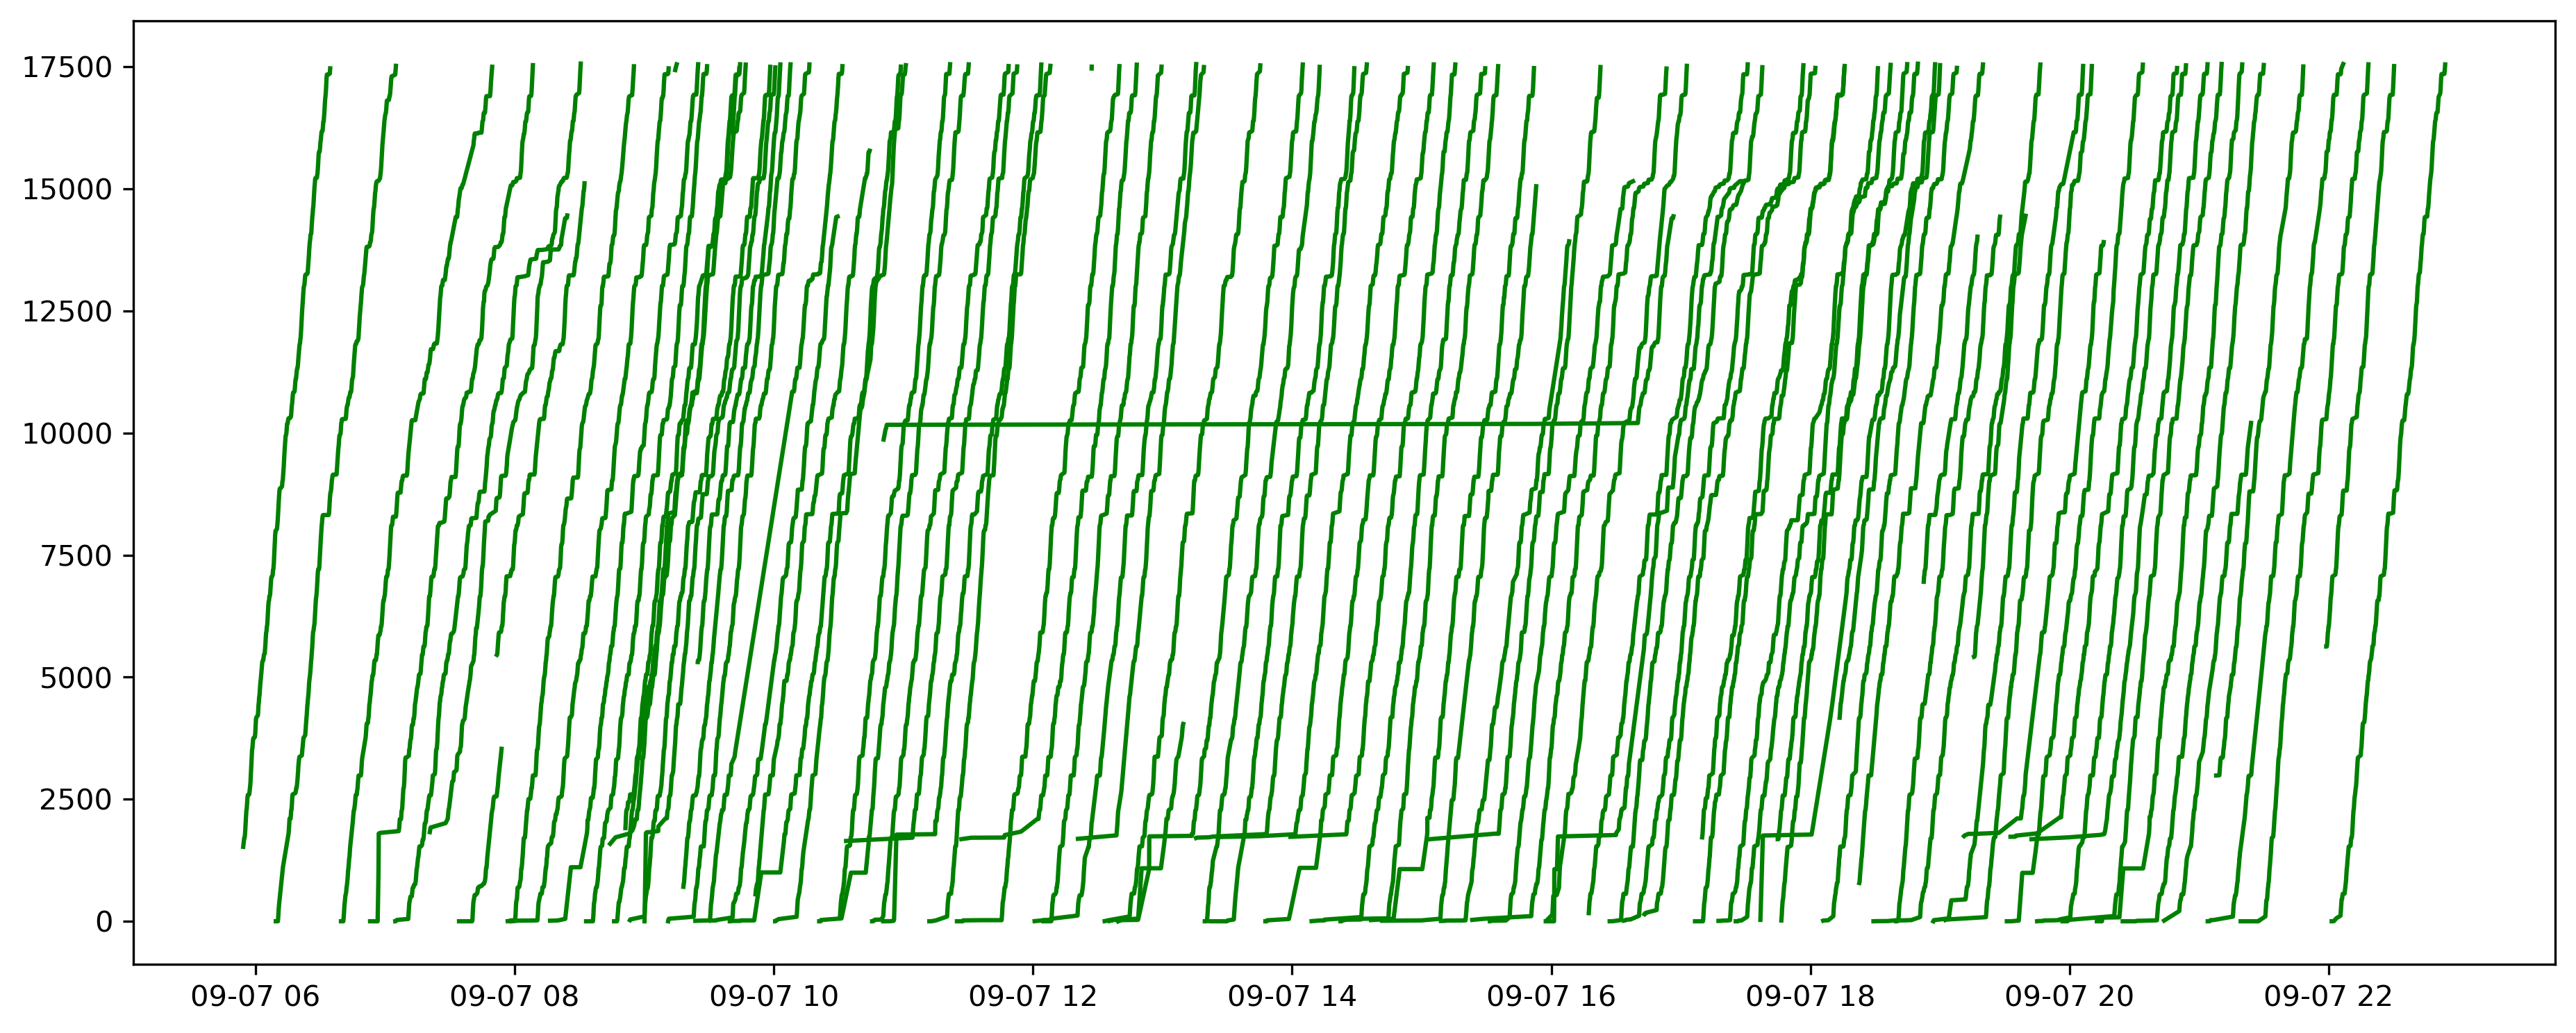

In [14]:
print(day.time.min(), day.time.max()) 
fig, ax = plt.subplots(dpi=300, figsize = (15,6))
for nidx in day.nidx.unique():
    routine = load_routinedf(day, nidx, direction)
    routine = post_process(routine, date=date)
    if len(routine) > 0:
        if routine.deadheading[0] == 0:
            ax.plot(routine.time, routine.cum_length, color = 'green')
        else:
            ax.plot(routine.time, routine.cum_length, color = 'red')
        
# ax.plot(routine1.time, routine1.cum_length)
# ax.plot(routine2.time, routine2.cum_length)

2.1 准点率

In [ ]:
# start_time_lolim = timetable_up['start_time_lolim']
# start_time_hilim = timetable_up['start_time_hilim']
# maxtime = truetime_up['max'][0]
# start_tar = timetable_up.loc[
#             (
#                 (start_time_lolim <= maxtime) 
#                 & (start_time_hilim >= maxtime)
#             )
#     ].reset_index(drop = True)
# start_tar['start_time_lolim']

In [10]:
# timetable_up,timetable_down,truetime_up,truetime_down = generate_intime(date='06', time_range=[0, 0, 23, 59])
truetime_up,truetime_down = generate_intime(date='10', time_range=[0, 0, 23, 59])
truetime_up.head(3)

,nidx,direction,station_status,vid,deadheading,cum_length,velocity,min,max,intime,lolim,hilim
0,0,0,菊园车站,4.0,0.0,80.977138,0.673838,2021-09-10 05:58:44,2021-09-10 06:29:07,True,2021-09-10 06:27:00,2021-09-10 06:30:00
29,0,0,公交嘉定新城站,4.0,0.0,17322.647191,5.124500,2021-09-10 07:29:33,2021-09-10 07:30:53,True,2021-09-10 07:27:00,2021-09-10 07:27:00
30,1,0,菊园车站,4.0,0.0,222.730063,1.093378,2021-09-10 08:53:56,2021-09-10 09:01:57,True,2021-09-10 08:59:00,2021-09-10 09:02:00


2.1.1 计算所有班次平均出发准点率

In [3]:
restriction = [1,2]

sum_up_start_intime = 0
sum_up_start = 0
sum_down_start_intime = 0
sum_down_start = 0

for date in [
            '06',
            '07',
            '08',
            '09',
            '10'
            ]:
    truetime_up,truetime_down = generate_intime(date=date, time_range=[0, 0, 23, 59],restriction=restriction)
    # truetime_up,truetime_down = generate_test_intime(date=date, time_range=[0, 0, 23, 59],restriction=restriction)
    up_start_intime = truetime_up.loc[(truetime_up['station_status'] == '菊园车站') & (truetime_up['intime'])]
    up_start = truetime_up.loc[truetime_up['station_status'] == '菊园车站']
    down_start_intime = truetime_down.loc[(truetime_down['station_status'] == '公交嘉定新城站') & (truetime_down['intime'])]
    down_start = truetime_down.loc[truetime_down['station_status'] == '公交嘉定新城站']
    sum_up_start_intime += len(up_start_intime)
    sum_up_start += len(up_start)
    sum_down_start_intime += len(down_start_intime)
    sum_down_start += len(down_start)
# print(sum_up_start_intime)
# print(sum_up_start)
allday_up_intime_rate = sum_up_start_intime / sum_up_start
allday_down_intime_rate = sum_down_start_intime / sum_down_start
allday_up_intime_rate, allday_down_intime_rate

(0.9407894736842105, 0.88)

2.1.2 计算所有班次早晚高峰出发准点率

In [25]:
restriction = [1,2]

sum_up_start_intime = 0
sum_up_start = 0
sum_down_start_intime = 0
sum_down_start = 0

for date in [
            '06',
            '07',
            '08',
            '09',
            '10'
            ]:
    truetime_up,truetime_down = generate_intime(date=date, time_range=[7, 0, 9, 30],restriction=restriction)
    # truetime_up,truetime_down = generate_test_intime(date=date, time_range=[7, 0, 9, 30],restriction=restriction)

    up_start_intime = truetime_up.loc[(truetime_up['station_status'] == '菊园车站') & (truetime_up['intime'])]
    up_start = truetime_up.loc[truetime_up['station_status'] == '菊园车站']
    down_start_intime = truetime_down.loc[(truetime_down['station_status'] == '公交嘉定新城站') & (truetime_down['intime'])]
    down_start = truetime_down.loc[truetime_down['station_status'] == '公交嘉定新城站']
    sum_up_start_intime += len(up_start_intime)
    sum_up_start += len(up_start)
    sum_down_start_intime += len(down_start_intime)
    sum_down_start += len(down_start)
morning_up_intime_rate = sum_up_start_intime / sum_up_start
morning_down_intime_rate = sum_down_start_intime / sum_down_start
print((morning_up_intime_rate, morning_down_intime_rate))

sum_up_start_intime = 0
sum_up_start = 0
sum_down_start_intime = 0
sum_down_start = 0

for date in [
            '06',
            '07',
            '08',
            '09',
            '10'
            ]:
    truetime_up,truetime_down = generate_intime(date=date, time_range=[16, 30, 19, 30],restriction=restriction)
    # truetime_up,truetime_down = generate_test_intime(date=date, time_range=[16, 30, 19, 30],restriction=restriction)

    up_start_intime = truetime_up.loc[(truetime_up['station_status'] == '菊园车站') & (truetime_up['intime'])]
    up_start = truetime_up.loc[truetime_up['station_status'] == '菊园车站']
    down_start_intime = truetime_down.loc[(truetime_down['station_status'] == '公交嘉定新城站') & (truetime_down['intime'])]
    down_start = truetime_down.loc[truetime_down['station_status'] == '公交嘉定新城站']
    sum_up_start_intime += len(up_start_intime)
    sum_up_start += len(up_start)
    sum_down_start_intime += len(down_start_intime)
    sum_down_start += len(down_start)
night_up_intime_rate = sum_up_start_intime / sum_up_start
night_down_intime_rate = sum_down_start_intime / sum_down_start
print((night_up_intime_rate, night_down_intime_rate))

(0.8888888888888888, 0.9)
(0.8823529411764706, 0.8461538461538461)


2.1.3 计算所有班次首末班车出发准点率

In [2]:
restriction = [1,2]
up_first_intime = 0
up_first_has_data = 0

down_first_intime = 0
down_first_has_data = 0

up_last_intime = 0
up_last_has_data = 0

down_last_intime = 0
down_last_has_data = 0

for date in [
            '06',
            '07',
            '08',
            '09',
            '10'
            ]:
    truetime_up,truetime_down = generate_intime(date=date, time_range=[0, 0, 23, 59], restriction=restriction)
    if len(truetime_up.loc[(truetime_up['station_status'] == '菊园车站') \
                & (truetime_up['intime'])\
                & (truetime_up['hilim'] == dt(year=2021, month=9, day=int(date), hour=4, minute=47, second=0))]
        ):
        up_first_intime += 1
    if len(truetime_up.loc[(truetime_up['station_status'] == '菊园车站') \
                & (truetime_up['max'] <= dt(year=2021, month=9, day=int(date), hour=4, minute=55, second=0))]
        ):
        up_first_has_data += 1
        
    if len(truetime_up.loc[(truetime_up['station_status'] == '菊园车站') \
                & (truetime_up['intime']) \
                & (truetime_up['hilim'] == dt(year=2021, month=9, day=int(date), hour=21, minute=12, second=0))]
        ):
        up_last_intime += 1
    if len(truetime_up.loc[(truetime_up['station_status'] == '菊园车站') \
                & (truetime_up['max'] >= dt(year=2021, month=9, day=int(date), hour=21, minute=3, second=0))]
        ):
        up_last_has_data += 1
        
    if len(truetime_down.loc[(truetime_down['station_status'] == '公交嘉定新城站') \
                & (truetime_down['intime']) \
                & (truetime_down['hilim'] == dt(year=2021, month=9, day=int(date), hour=5, minute=32, second=0))]
        ):
        down_first_intime += 1
    if len(truetime_down.loc[(truetime_down['station_status'] == '公交嘉定新城站') \
                & (truetime_down['max'] <= dt(year=2021, month=9, day=int(date), hour=5, minute=40, second=0))]
        ):
        down_first_has_data += 1
    
    
    if len(truetime_down.loc[(truetime_down['station_status'] == '公交嘉定新城站') \
                & (truetime_down['intime']) \
                & (truetime_down['hilim'] == dt(year=2021, month=9, day=int(date), hour=22, minute=7, second=0))]
        ):
        down_last_intime += 1
    if len(truetime_down.loc[(truetime_down['station_status'] == '公交嘉定新城站') \
                & (truetime_down['max'] >= dt(year=2021, month=9, day=int(date), hour=21, minute=55, second=0))]
        ):
        down_last_has_data += 1
    
print('up_first:')
print([up_first_intime, up_first_has_data, up_first_intime/up_first_has_data])
print('up_last:')
print([up_last_intime, up_last_has_data, up_last_intime/up_last_has_data])
print('down_first:')
print([down_first_intime, down_first_has_data, down_first_intime/down_first_has_data])
print('down_last:')
print([down_last_intime, down_last_has_data, down_last_intime/down_last_has_data])

up_first:
[4, 4, 1.0]
up_last:
[5, 5, 1.0]
down_first:
[3, 3, 1.0]
down_last:
[4, 5, 0.8]


2.2.1  找到准点率最低的一天，对其分析偏差情况

In [57]:
restriction = [1,2]

sum_up_start_intime = 0
sum_up_start = 0
sum_down_start_intime = 0
sum_down_start = 0

for date in [
            '06',
            '07',
            '08',
            '09',
            '10'
            ]:
    truetime_up,truetime_down = generate_intime(date=date, time_range=[0, 0, 23, 59],restriction=restriction)
    # truetime_up,truetime_down = generate_test_intime(date=date, time_range=[0, 0, 23, 59],restriction=restriction)
    up_start_intime = truetime_up.loc[(truetime_up['station_status'] == '菊园车站') & (truetime_up['intime'])]
    up_start = truetime_up.loc[truetime_up['station_status'] == '菊园车站']
    down_start_intime = truetime_down.loc[(truetime_down['station_status'] == '公交嘉定新城站') & (truetime_down['intime'])]
    down_start = truetime_down.loc[truetime_down['station_status'] == '公交嘉定新城站']
    sum_up_start_intime = len(up_start_intime)
    sum_up_start = len(up_start)
    sum_down_start_intime = len(down_start_intime)
    sum_down_start = len(down_start)
    allday_up_intime_rate = sum_up_start_intime / sum_up_start
    allday_down_intime_rate = sum_down_start_intime / sum_down_start
    print([allday_up_intime_rate, allday_down_intime_rate])

[0.8817204301075269, 0.8313253012048193]
[0.9444444444444444, 0.8571428571428571]
[0.9888888888888889, 0.8472222222222222]
[0.9120879120879121, 0.9012345679012346]
[0.9782608695652174, 0.9605263157894737]


In [11]:
# pd.Timedelta(days = 1) - dt(year=2021, month=9, day=int(date), hour=5, minute=40, second=0) + dt(year=2021, month=9, day=int(date), hour=5, minute=40, second=4)

In [12]:
pd.Timedelta(days = 1).days

1

In [2]:
def start_time_delta(timetable_row, time):
    res = timetable_row['start_time'] - time
    if res.days == 0:
        return res
    return time - timetable_row['start_time']


def end_time_delta(timetable_row, time):
    res = timetable_row['end_time'] - time
    if res.days == 0:
        return res
    return time - timetable_row['end_time']

def offset_matching(truetime_row, timetabledf):
    mintime = truetime_row['min']
    maxtime = truetime_row['max']
    start_time_lolim = timetabledf['start_time_lolim']
    start_time_hilim = timetabledf['start_time_hilim']
    end_time_lolim = timetabledf['end_time_lolim']
    end_time_hilim = timetabledf['end_time_hilim']
    
    sp_start_tar = timetabledf.loc[
                (
                    (start_time_lolim <= (maxtime - pd.Timedelta(minutes=1.5))) 
                    & (start_time_hilim >= (maxtime - pd.Timedelta(minutes=1.5)))
                )
        ].reset_index(drop = True)
    sp1_start_tar = timetabledf.loc[
                (
                    (start_time_lolim <= (maxtime - pd.Timedelta(minutes=1))) 
                    & (start_time_hilim >= (maxtime- pd.Timedelta(minutes=1)))
                )
        ].reset_index(drop = True)
    end_tar = timetabledf.loc[
                (
                    ( end_time_lolim <= mintime) 
                    & ( end_time_hilim >= mintime)
                )
        ].reset_index(drop = True)
    
    if truetime_row['direction'] == 0:
        if truetime_row['station_status'] == '菊园车站':
            
            truetime_row['max'] -= pd.Timedelta(minutes=1.5)
            maxtime -= pd.Timedelta(minutes=1.5)
            
            if len(sp_start_tar) > 0:
                truetime_row['intime'] = True
                truetime_row['lolim'] = sp_start_tar['start_time_lolim'][0]
                truetime_row['hilim'] = sp_start_tar['start_time_hilim'][0]
            else:
                time_delta = timetabledf.apply(start_time_delta, args = (maxtime,), axis = 1)
                taridx = time_delta.idxmin()
                truetime_row['lolim'] = start_time_lolim.loc[taridx]
                truetime_row['hilim'] = start_time_hilim.loc[taridx]
                
            standard_time = truetime_row['lolim'] + pd.Timedelta(minutes=1)
            if maxtime > standard_time:
                truetime_row['offset'] = (maxtime - standard_time).seconds
            else:
                truetime_row['offset'] = - (standard_time - maxtime).seconds
            
        else:
            if len(end_tar) > 0:
                truetime_row['intime'] = True
                truetime_row['lolim'] = end_tar['end_time_lolim'][0]
                truetime_row['hilim'] = end_tar['end_time_hilim'][0]
            else:
                time_delta = timetabledf.apply(end_time_delta, args = (mintime,), axis = 1)
                taridx = time_delta.idxmin()
                truetime_row['lolim'] = end_time_lolim.loc[taridx]
                truetime_row['hilim'] = end_time_hilim.loc[taridx]
            
            standard_time = truetime_row['lolim'] + pd.Timedelta(minutes=1)
            if mintime > standard_time:
                truetime_row['offset'] = (mintime - standard_time).seconds
            else:
                truetime_row['offset'] = - (standard_time - mintime).seconds
                
    else:
        if truetime_row['station_status'] == '公交嘉定新城站':
            
            truetime_row['max'] -= pd.Timedelta(minutes=1)
            maxtime -= pd.Timedelta(minutes=1)
            
            if len(sp1_start_tar) > 0:
                truetime_row['intime'] = True
                truetime_row['lolim'] = sp1_start_tar['start_time_lolim'][0]
                truetime_row['hilim'] = sp1_start_tar['start_time_hilim'][0]
            else:
                time_delta = timetabledf.apply(start_time_delta, args = (maxtime,), axis = 1)
                taridx = time_delta.idxmin()
                truetime_row['lolim'] = start_time_lolim.loc[taridx]
                truetime_row['hilim'] = start_time_hilim.loc[taridx]
            
            standard_time = truetime_row['lolim'] + pd.Timedelta(minutes=1)
            if maxtime > standard_time:
                truetime_row['offset'] = (maxtime - standard_time).seconds
            else:
                truetime_row['offset'] = - (standard_time - maxtime).seconds
        
        else:
            if len(end_tar) > 0:
                truetime_row['intime'] = True
                truetime_row['lolim'] = end_tar['end_time_lolim'][0]
                truetime_row['hilim'] = end_tar['end_time_hilim'][0]
            else:
                time_delta = timetabledf.apply(end_time_delta, args = (mintime,), axis = 1)
                taridx = time_delta.idxmin()
                truetime_row['lolim'] = end_time_lolim.loc[taridx]
                truetime_row['hilim'] = end_time_hilim.loc[taridx]
                
            standard_time = truetime_row['lolim'] + pd.Timedelta(minutes=1)
            if mintime > standard_time:
                truetime_row['offset'] = (mintime - standard_time).seconds
            else:
                truetime_row['offset'] = - (standard_time - mintime).seconds
    if truetime_row['offset'] > 1200:
         return
    return truetime_row

def generate_offset(date='06'):
    path_timetable = './data/timetable/'
    timetable_up = pd.read_csv(path_timetable + 'timetable_up_09' + date + '.csv')
    timetable_up = process_timetable(timetable_up, int(date), restriction)
    timetable_down = pd.read_csv(path_timetable + 'timetable_down_09' + date + '.csv')
    timetable_down = process_timetable(timetable_down, int(date), restriction)
    
    path_truetime = './data/analysis/'
    truetime_up = pd.read_pickle(path_truetime + 'truetime_up_09' + date + '.pkl')
    truetime_up = truetime_up.loc[(
            ((truetime_up['station_status'] == '公交嘉定新城站') | (truetime_up['station_status'] == '菊园车站'))
        )]
    truetime_up['intime'] = [False for _ in range(len(truetime_up))]
    truetime_up['lolim'] = [None for _ in range(len(truetime_up))]
    truetime_up['hilim'] = [None for _ in range(len(truetime_up))]
    truetime_up['offset'] = [None for _ in range(len(truetime_up))]
    
    truetime_down = pd.read_pickle(path_truetime + 'truetime_down_09' + date + '.pkl')
    truetime_down = truetime_down.loc[(
            ((truetime_down['station_status'] == '公交嘉定新城站') | (truetime_down['station_status'] == '菊园车站'))
        )]
    truetime_down['intime'] = [False for _ in range(len(truetime_down))]
    truetime_down['lolim'] = [None for _ in range(len(truetime_down))]
    truetime_down['hilim'] = [None for _ in range(len(truetime_down))]
    truetime_down['offset'] = [None for _ in range(len(truetime_down))]
    
    truetime_up = truetime_up.apply(
        offset_matching, 
        args=(timetable_up,),
        # result_type='broadcast',
        axis = 1,
        )
    truetime_down = truetime_down.apply(
        offset_matching, 
        args=(timetable_down,), 
        # result_type='broadcast',
        axis = 1,
        )
    
    return truetime_up,truetime_down
    

In [18]:
truetime_up['offset'].max()

360.0

In [18]:
restriction = [1,2]
date = '06'
truetime_up, truetime_down = generate_offset(date=date)
truetime_up = truetime_up.dropna()
truetime_up['offset'] = [i/60 for i in truetime_up['offset']]
# truetime_up['lolim'] = [_.to_pydatetime() for _ in truetime_up['lolim']]

# truetime_up
# truetime_up['standard_time'] = truetime_up['lowlim'] + [pd.Timedelta(minutes=1) for _ in range(len(truetime_up))]
# truetime_down['standard_time'] = truetime_down['lowlim'] + [pd.Timedelta(minutes=1) for _ in range(len(truetime_down))]

Text(0, 0.5, '与时刻表偏差（分钟）')

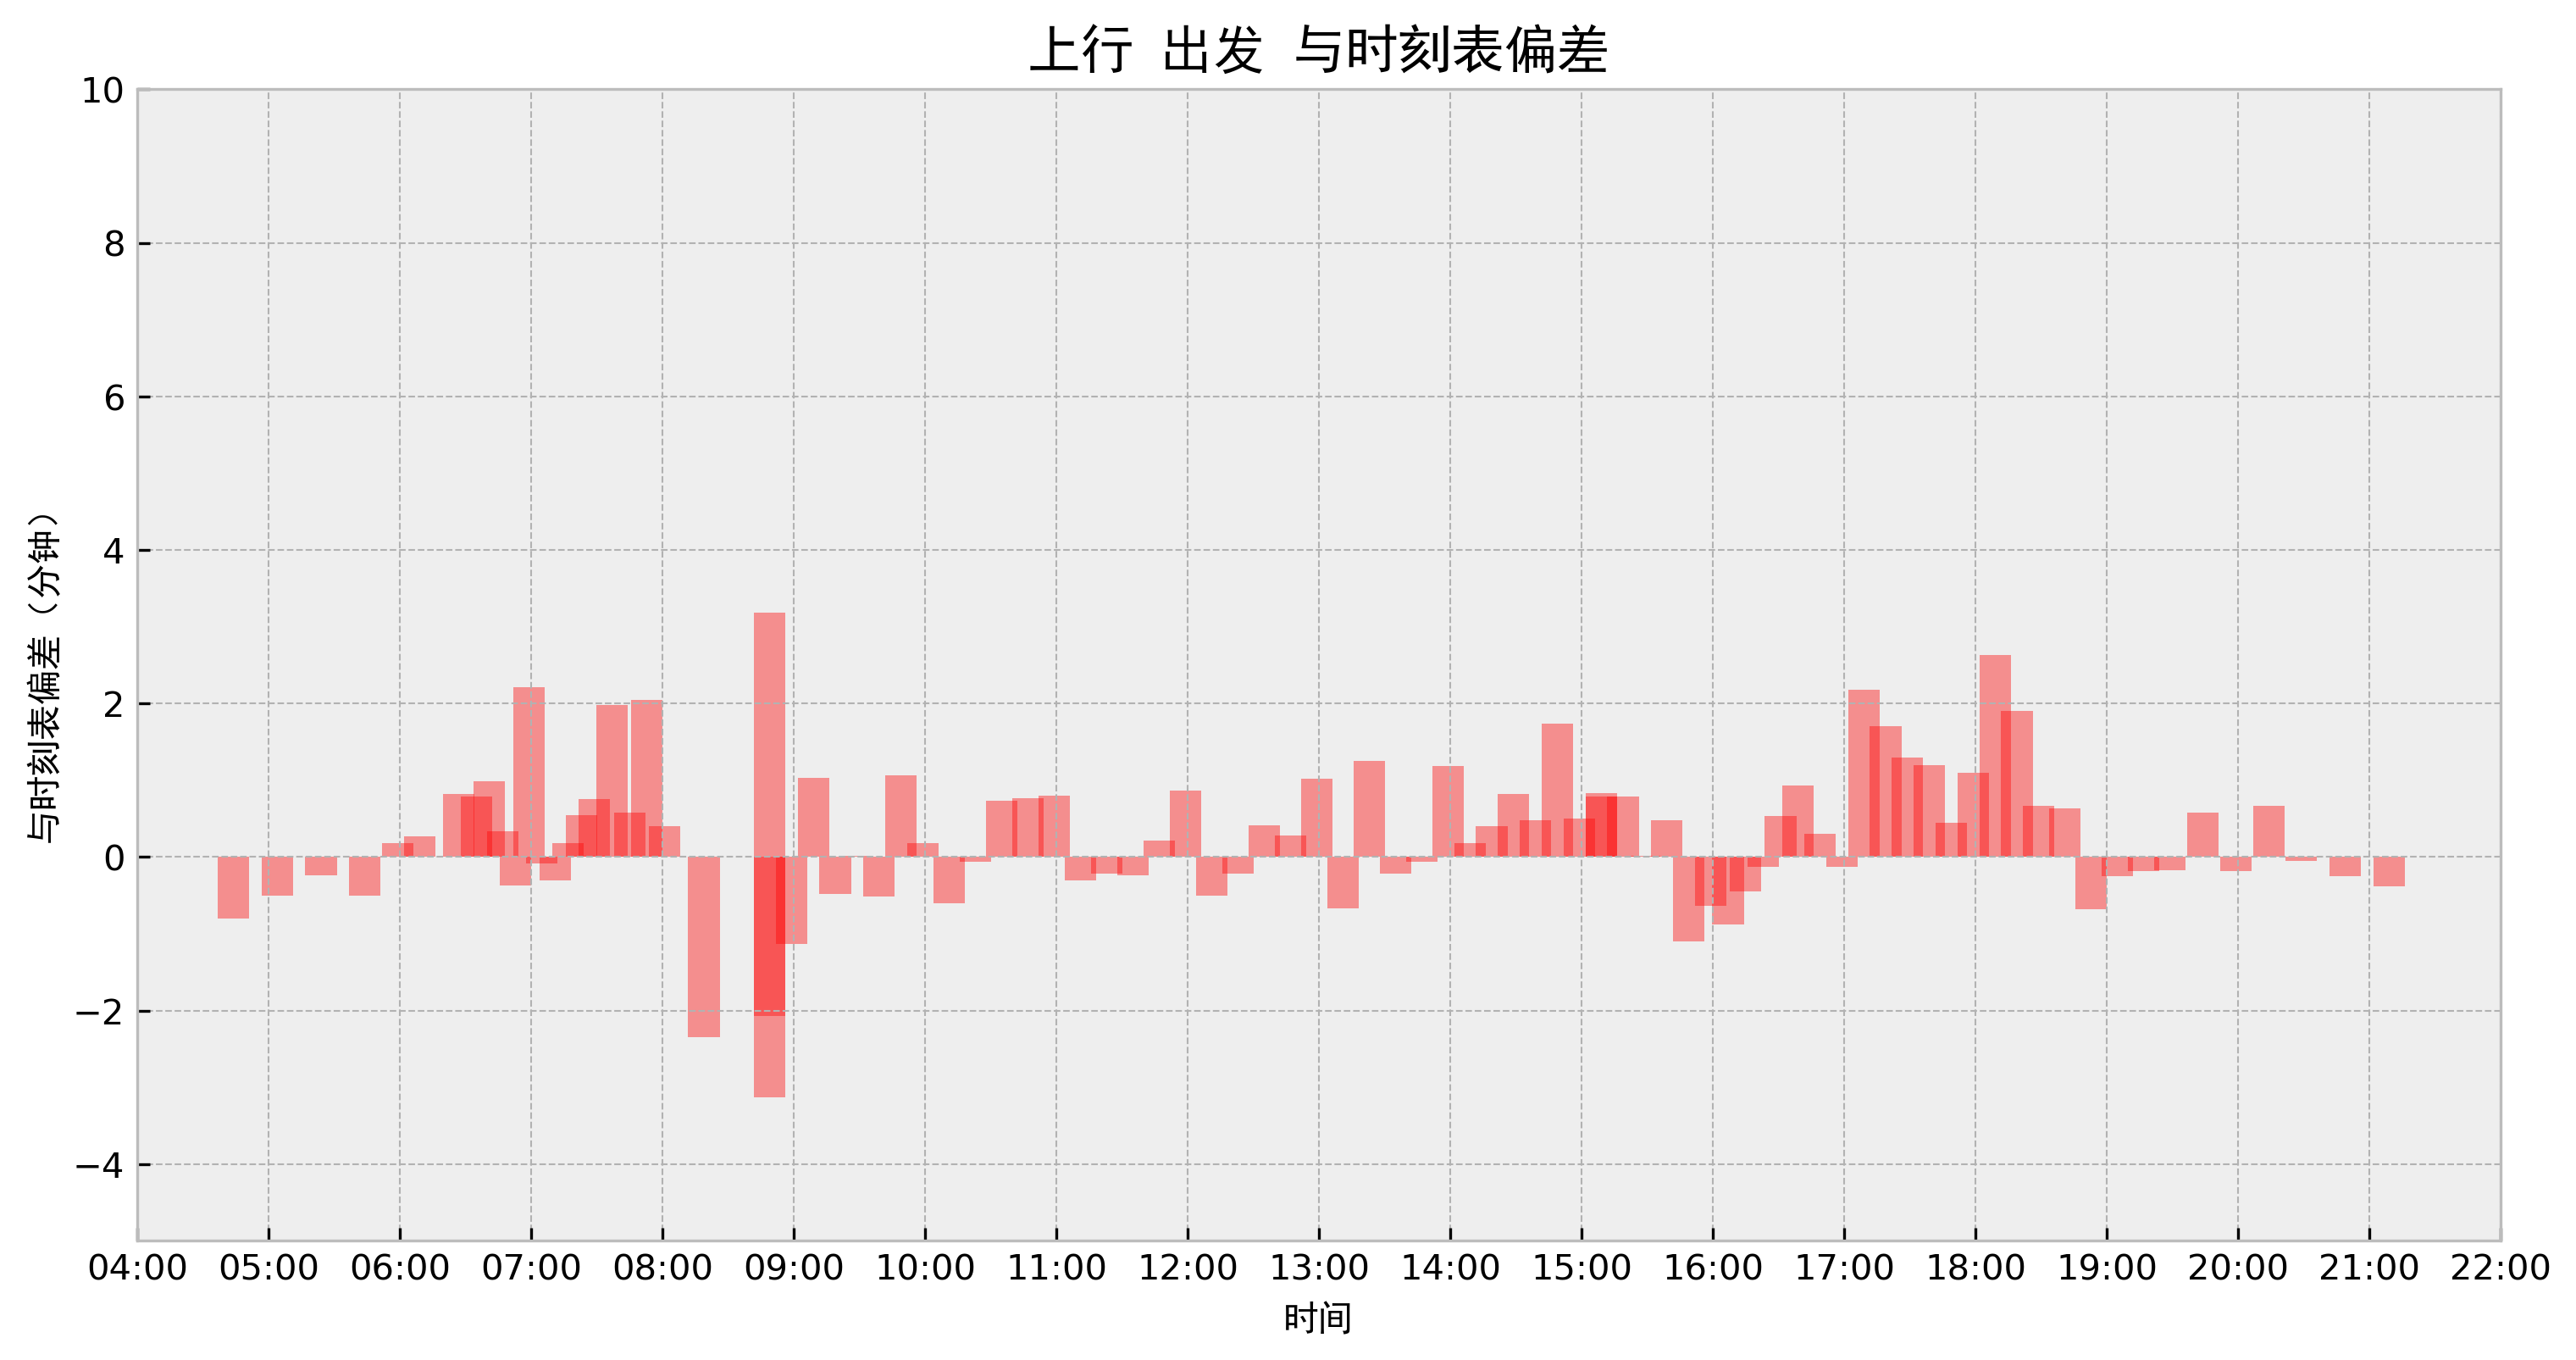

In [62]:

plotdf = truetime_up.loc[(truetime_up['station_status'] == '菊园车站')].sort_values('lolim')
# truetime_up.loc[(truetime_up['station_status'] == '菊园车站')].sort_values('lolim').plot(x='lolim', y='offset', kind='bar', ax=ax)


formatter = mdates.DateFormatter('%H:%M')
loactor = mdates.HourLocator()
plt.style.use('bmh')
fig, ax = plt.subplots(figsize=(12,6),dpi=300)
xticks = [dt(year=2021, month=9, day=6, hour=i, minute=0) for i in range(4, 23)]
ax.set_xlim([dt(year=2021, month=9, day=6, hour=4, minute=0),
        dt(year=2021, month=9, day=6, hour=22, minute=0)])
ax.set_xticks(xticks)
ax.xaxis.set_major_locator(loactor)
ax.xaxis.set_major_formatter(formatter)

ax.bar(x=[_.to_pydatetime() for _ in plotdf['lolim']],
        height=[_ for _ in plotdf['offset']],
        width=0.01,
        alpha=0.4,
        color='red')
ax.set_ylim([-5,10])


fontdict={"family": "SimHei", "size": 15, "color": "black"}
ax.set_title('上行 出发 与时刻表偏差', fontdict=fontdict,)
ax.set_xlabel('时间', fontdict={"family": "SimHei", "size": 10, "color": "black"},)
ax.set_ylabel('与时刻表偏差（分钟）', fontdict={"family": "SimHei", "size": 10, "color": "black"},)

2.3.1  发车间隔分析

In [6]:
truetime_up,truetime_down = generate_intime(date='06', time_range=[0, 0, 23, 59])
# truetime_up.head(3)

,nidx,direction,station_status,vid,deadheading,cum_length,velocity,min,max,intime,lolim,hilim
0,0,0,菊园车站,4.0,0.0,96.873790,0.923293,2021-09-06 05:53:34,2021-09-06 06:10:16,True,2021-09-06 06:09:00,2021-09-06 06:12:00
28,0,0,公交嘉定新城站,4.0,0.0,17377.279898,6.253031,2021-09-06 07:07:13,2021-09-06 07:07:48,False,NaT,NaT
29,1,0,菊园车站,4.0,1.0,229.005031,1.141247,2021-09-06 08:49:11,2021-09-06 08:54:41,False,NaT,NaT


<DateOffset: minutes=10>

In [80]:
# test = pd.DataFrame({'group':['A','A','B','B'], 'val':[np.nan, 1, 2, 3]})
# test.groupby('group').agg('mean'), test

(       val
 group     
 A      1.0
 B      2.5,
   group  val
 0     A  NaN
 1     A  1.0
 2     B  2.0
 3     B  3.0)

Text(0, 0.5, '发车间隔（分钟）')

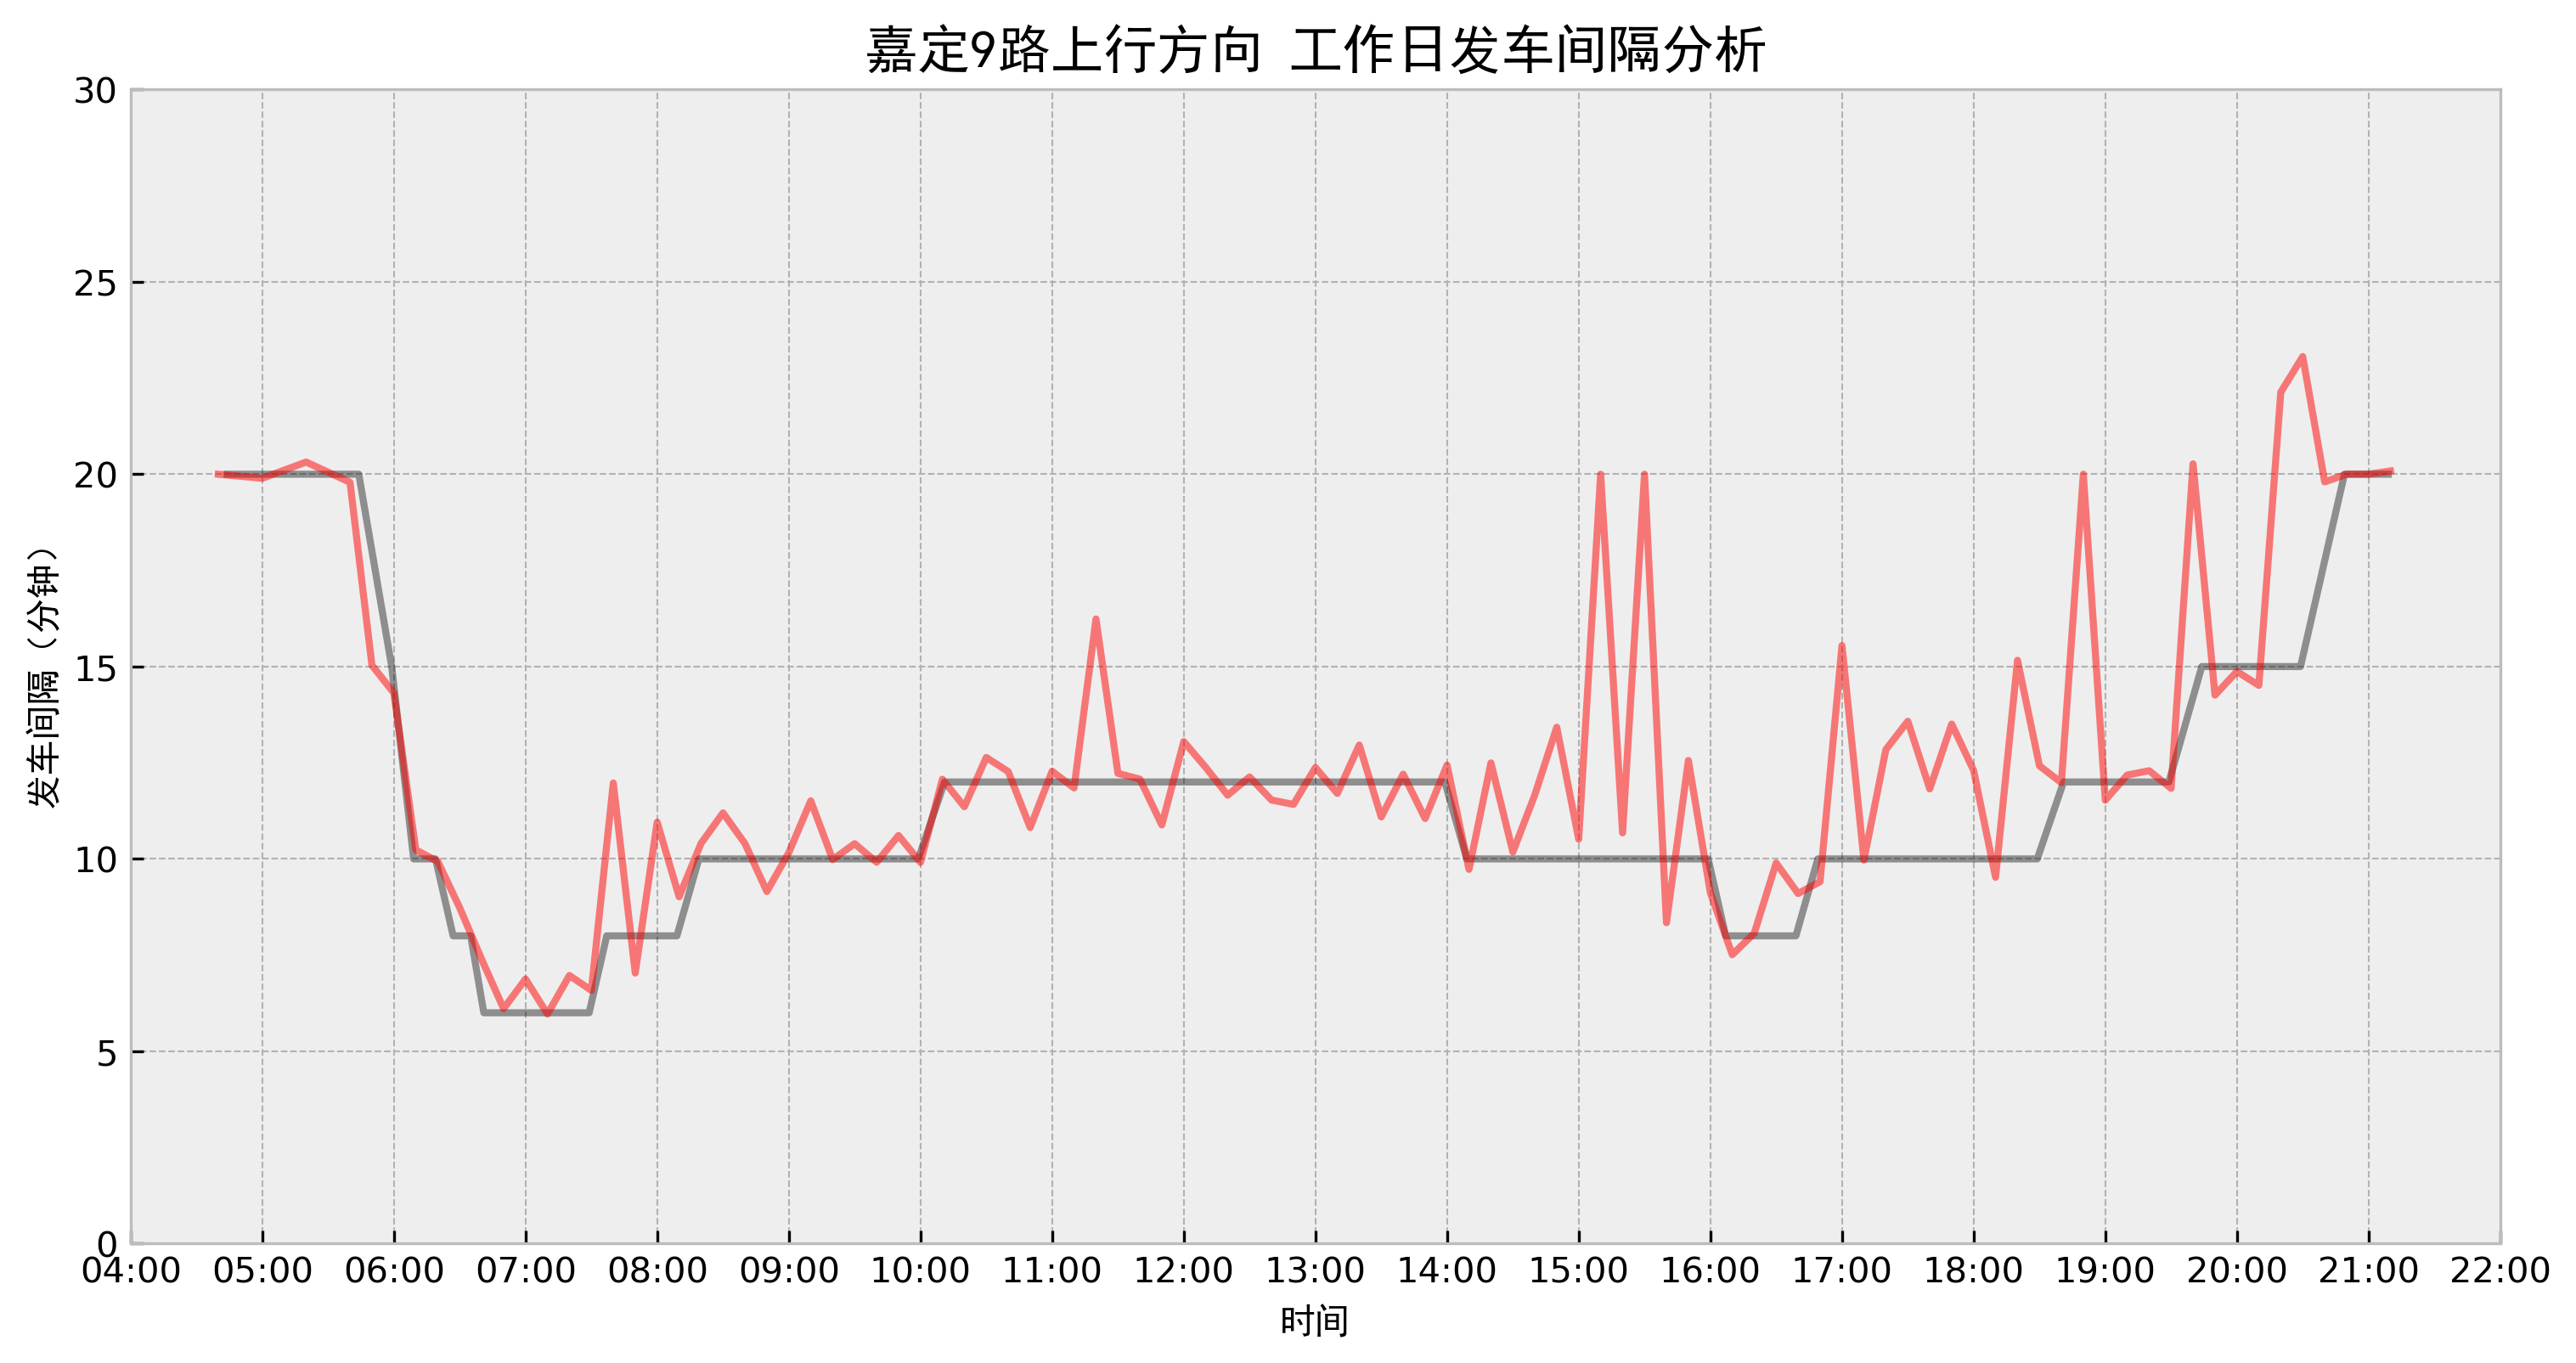

In [106]:
plotdf = pd.read_csv('./data/testoutput/startdiffplot.csv')
plotdf['max'] = pd.to_datetime(plotdf['max'])
# time_offset = pd.Timedelta(days = int(date) - 6)
time_offset = pd.Timedelta(days = 6 - 6)
plotdf['max'] = [_ - time_offset for _ in plotdf['max']]

s_date = pd.to_datetime('2021-9-6 00:00:00')
e_date = pd.to_datetime('2021-9-6 23:59:59')
bins = pd.date_range(s_date, e_date+pd.Timedelta(days=1), freq=pd.tseries.offsets.DateOffset(minutes=10))
plotdf['time_group'] = pd.cut(plotdf['max'], bins=bins, right=False)
plotdf = plotdf[['time_group','diff_start']]
plotdf = plotdf[['time_group','diff_start']].groupby('time_group').agg('mean').reset_index()

for date in [
            '07',
            '08',
            '09',
            '10'
            ]:
            truetime_up,_ = generate_intime(date=date, time_range=[0, 0, 23, 59])
            middf = truetime_up.loc[truetime_up['station_status']=='菊园车站'].sort_values('lolim').dropna()
            middf['diff_start'] = middf['max'].diff()
            middf['diff_start'] = [20]+[int(_.seconds)/60 for _ in middf['diff_start'][1:]]
            time_offset = pd.Timedelta(days = int(date) - 6)
            middf['max'] = [_ - time_offset for _ in middf['max']]
            middf['time_group'] = pd.cut(middf['max'], bins=bins, right=False)
            middf = middf[['time_group','diff_start']]
            # middf = middf[['time_group','diff_start']].groupby('time_group').agg('mean').reset_index()
            # middf.to_csv('./data/testoutput/startdiffplot.csv')
            plotdf = pd.concat([plotdf, middf], ignore_index=True).reset_index(drop = True)
plotdf = plotdf.groupby('time_group').agg('mean').dropna().reset_index()

timetable_up = process_timetable(pd.read_csv('./data/timetable/timetable_up_0906.csv'), 6, [1,2])
timetable_up['diff_start'] = timetable_up['start_time'].diff()
timetable_up['diff_start'] = [20]+[int(_.seconds)/60 for _ in timetable_up['diff_start'][1:]]
# plotdf = truetime_up.loc[truetime_up['station_status']=='菊园车站'].sort_values('lolim').dropna()
# plotdf['diff_start'] = plotdf['max'].diff()
# plotdf['diff_start'] = [20]+[int(_.seconds)/60 for _ in plotdf['diff_start'][1:]]
# plotdf.to_csv('./data/testoutput/startdiffplot.csv')
# plotdf = pd.read_csv('./data/testoutput/startdiffplot.csv')
# plotdf['lolim'] = pd.to_datetime(plotdf['lolim'])
# plotdf['max'] = pd.to_datetime(plotdf['max'])

formatter = mdates.DateFormatter('%H:%M')
loactor = mdates.HourLocator()
plt.style.use('bmh')
fig, ax = plt.subplots(figsize=(12,6),dpi=300)
xticks = [dt(year=2021, month=9, day=6, hour=i, minute=0) for i in range(4, 23)]
ax.set_xlim([dt(year=2021, month=9, day=6, hour=4, minute=0),
        dt(year=2021, month=9, day=6, hour=22, minute=0)])
ax.set_xticks(xticks)
ax.xaxis.set_major_locator(loactor)
ax.xaxis.set_major_formatter(formatter)

ax.plot([_.to_pydatetime() for _ in timetable_up['start_time_lolim']],
        [_ for _ in timetable_up['diff_start']],
        # width=0.01,
        alpha=0.4,
        color='black')
# ax.set_ylim([0,30])

def fix(x):
        if x > 25:
                return 20
        return x
        
ax.plot([_.left.to_pydatetime() for _ in plotdf['time_group']],
        [fix(_) for _ in plotdf['diff_start']],
        # width=0.01,
        alpha=0.5,
        color='red')
ax.set_ylim([0,30])

from matplotlib.font_manager import FontProperties
fontdict={"family": "SimHei", "size": 15, "color": "black"}
ax.set_title('嘉定9路上行方向 工作日发车间隔分析', fontdict=fontdict,)
ax.set_xlabel('时间', fontdict={"family": "SimHei", "size": 10, "color": "black"},)
ax.set_ylabel('发车间隔（分钟）', fontdict={"family": "SimHei", "size": 10, "color": "black"},)


Text(0, 0.5, '发车间隔（分钟）')

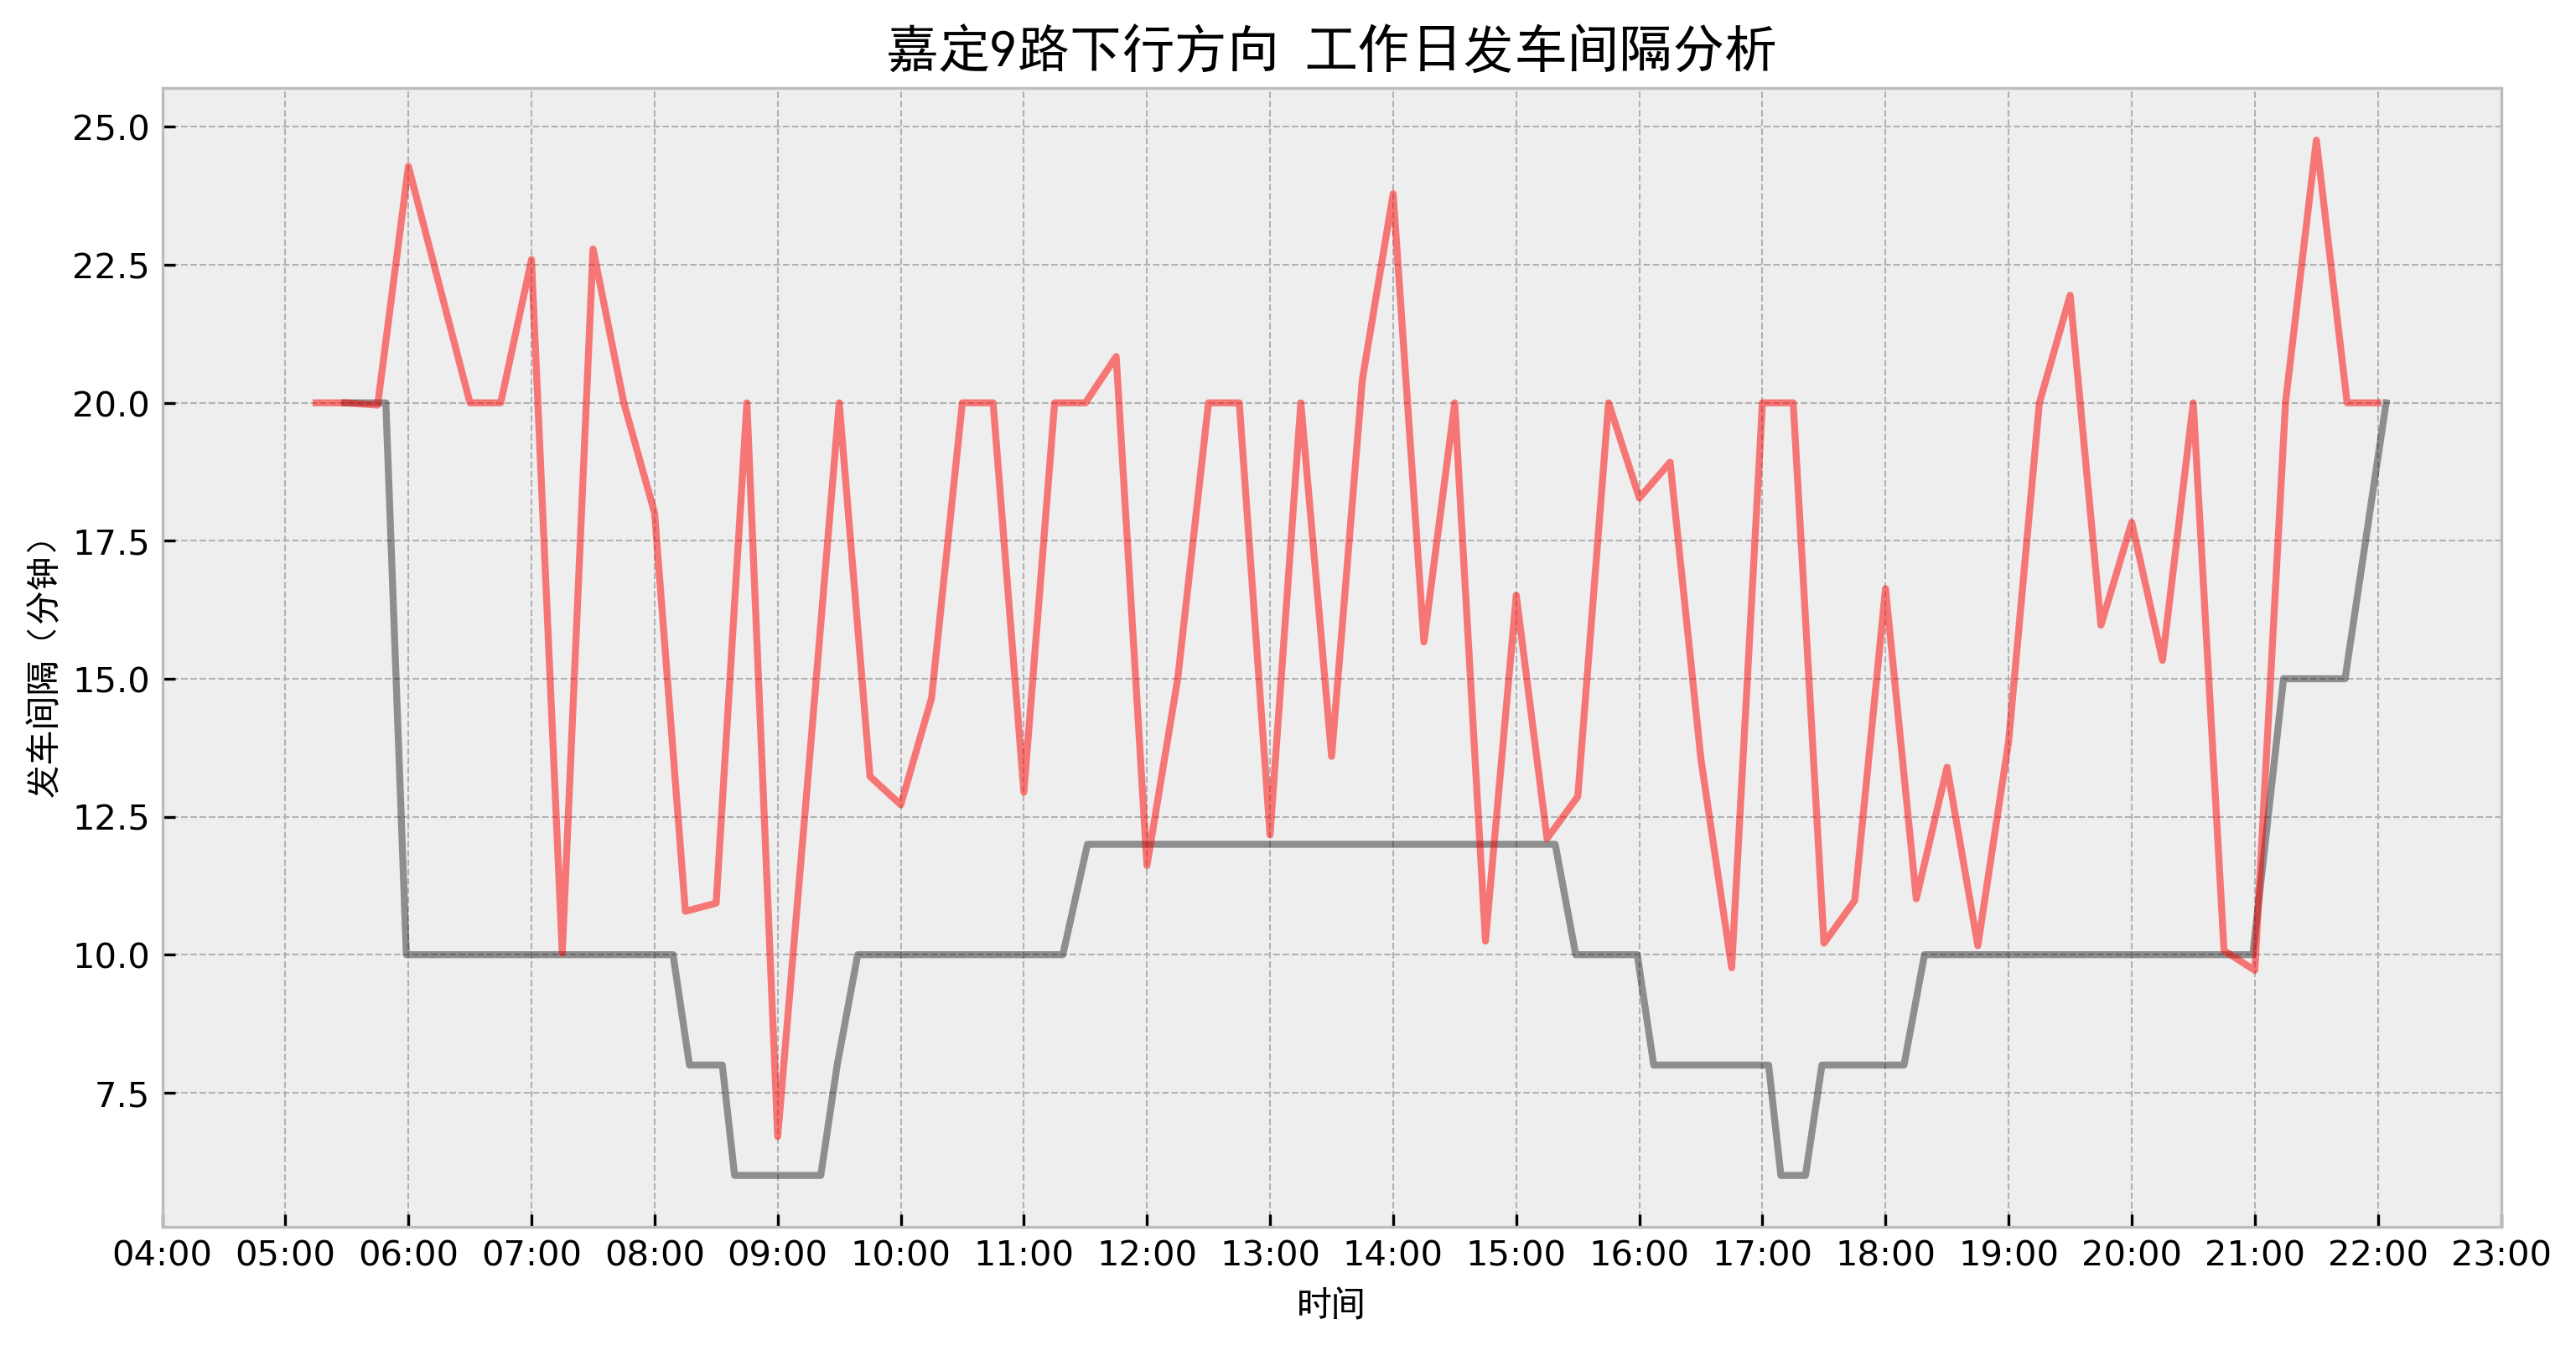

In [121]:
plotdf = pd.DataFrame()
s_date = pd.to_datetime('2021-9-6 00:00:00')
e_date = pd.to_datetime('2021-9-6 23:59:59')
bins = pd.date_range(s_date, e_date+pd.Timedelta(days=1), freq=pd.tseries.offsets.DateOffset(minutes=15))

for date in [
            '06',
            '07',
            '08',
            '09',
            '10'
            ]:
            _,truetime_up = generate_intime(date=date, time_range=[0, 0, 23, 59])
            middf = truetime_up.loc[truetime_up['station_status']=='公交嘉定新城站'].sort_values('lolim').dropna()
            middf['diff_start'] = middf['max'].diff()
            middf['diff_start'] = [20]+[int(_.seconds)/60 for _ in middf['diff_start'][1:]]
            time_offset = pd.Timedelta(days = int(date) - 6)
            middf['max'] = [_ - time_offset for _ in middf['max']]
            middf['time_group'] = pd.cut(middf['max'], bins=bins, right=False)
            middf = middf[['time_group','diff_start']]
            plotdf = pd.concat([plotdf, middf], ignore_index=True).reset_index(drop = True)
plotdf = plotdf.groupby('time_group').agg('mean').dropna().reset_index()

timetable_up = process_timetable(pd.read_csv('./data/timetable/timetable_down_0906.csv'), 6, [1,2])
timetable_up['diff_start'] = timetable_up['start_time'].diff()
timetable_up['diff_start'] = [20]+[int(_.seconds)/60 for _ in timetable_up['diff_start'][1:]]
# plotdf = truetime_up.loc[truetime_up['station_status']=='菊园车站'].sort_values('lolim').dropna()
# plotdf['diff_start'] = plotdf['max'].diff()
# plotdf['diff_start'] = [20]+[int(_.seconds)/60 for _ in plotdf['diff_start'][1:]]
# plotdf.to_csv('./data/testoutput/startdiffplot.csv')
# plotdf = pd.read_csv('./data/testoutput/startdiffplot.csv')
# plotdf['lolim'] = pd.to_datetime(plotdf['lolim'])
# plotdf['max'] = pd.to_datetime(plotdf['max'])

formatter = mdates.DateFormatter('%H:%M')
loactor = mdates.HourLocator()
plt.style.use('bmh')
fig, ax = plt.subplots(figsize=(12,6),dpi=300)
xticks = [dt(year=2021, month=9, day=6, hour=i, minute=0) for i in range(5, 24)]
ax.set_xlim([dt(year=2021, month=9, day=6, hour=4, minute=0),
        dt(year=2021, month=9, day=6, hour=22, minute=0)])
ax.set_xticks(xticks)
ax.xaxis.set_major_locator(loactor)
ax.xaxis.set_major_formatter(formatter)

ax.plot([_.to_pydatetime() for _ in timetable_up['start_time_lolim']],
        [_ for _ in timetable_up['diff_start']],
        # width=0.01,
        alpha=0.4,
        color='black')
# ax.set_ylim([0,30])
import random
# def fix(x):
#         if x > 25:
#                 return 20
#         return x
        
diff_start = plotdf['diff_start']
ax.plot([_.left.to_pydatetime() for _ in plotdf['time_group']],
        [fix(_) for _ in],
        # width=0.01,
        alpha=0.5,
        color='red')
# ax.set_ylim([0,30])

from matplotlib.font_manager import FontProperties
fontdict={"family": "SimHei", "size": 15, "color": "black"}
ax.set_title('嘉定9路下行方向 工作日发车间隔分析', fontdict=fontdict,)
ax.set_xlabel('时间', fontdict={"family": "SimHei", "size": 10, "color": "black"},)
ax.set_ylabel('发车间隔（分钟）', fontdict={"family": "SimHei", "size": 10, "color": "black"},)

In [122]:
diff_start = plotdf['diff_start']
diff_start

0     20.000000
1     20.000000
2     19.958333
3     24.283333
4     29.877778
        ...    
62     9.716667
63    20.016667
64    24.761111
65    30.458333
66    27.416667
Name: diff_start, Length: 67, dtype: float64

In [ ]:
up_end_intime = truetime_up.loc[(truetime_up['station_status'] == '公交嘉定新城站') & (truetime_up['intime'])]
down_end_intime = truetime_up.loc[(truetime_down['station_status'] == '菊园车站') & (truetime_down['intime'])]

In [ ]:
from datetime import datetime as dt
first_start_timetable = pd.DataFrame()
last_start_timetable = pd.DataFrame()
first_start_direction_list = []
last_start_direction_list = []
first_start_date_list = []
last_start_date_list = []
first_start_time_list = []
last_start_time_list = []
for date in [6,
            7,
            8,
            9,
            10,
            ]:
    day = load_daydf(date)
    hilim = pd.Timestamp(dt(2021,9,date, hour=23,minute=59,second=59))
    lolim = pd.Timestamp(dt(2021,9,date, hour=4,minute=0,second=0))
    day = day.drop(day.loc[(day['time'] > hilim) | (day['time'] < lolim)].index,
                    axis = 0
                ).reset_index(drop=True)
    for direction in [0, 1]:
        if direction == 0:
            direc_str = 'up'
            start_timetable = day.loc[(day['direction']==direction) & (day['station_status']=='菊园车站')].groupby(['nidx','station_status'])['time'].agg(['max'])
        else:
            direc_str = 'down'
            start_timetable = day.loc[(day['direction']==direction) & (day['station_status']=='公交嘉定新城站')].groupby(['nidx','station_status'])['time'].agg(['max'])
        # if len(start_timetable)
        first_start_time_list.append(start_timetable.min())
        last_start_time_list.append(start_timetable.max())
        first_start_date_list.append(date)
        last_start_date_list.append(date)
        first_start_direction_list.append(direction)
        last_start_direction_list.append(direction)
        # print(str(date) + ':\n' + str(start_timetable.min()) + '\n' +  str(start_timetable.max()))
first_start_timetable = pd.DataFrame({'date':first_start_date_list,
                                        'direction':first_start_direction_list,
                                        'time':first_start_time_list})
last_start_timetable = pd.DataFrame({'date':last_start_date_list,
                                        'direction':last_start_direction_list,
                                        'time':last_start_time_list})


In [ ]:
real_up_timetable = pd.concat([first_start_timetable.loc[first_start_timetable['direction']==0], last_start_timetable.loc[last_start_timetable['direction']==0]])
real_down_timetable = pd.concat([first_start_timetable.loc[first_start_timetable['direction']==1], last_start_timetable.loc[last_start_timetable['direction']==1]])

In [ ]:
real_up_timetable

In [ ]:
real_down_timetable

In [ ]:
standard_first_start_timetable = pd.DataFrame()
standard_last_start_timetable = pd.DataFrame()
standard_first_start_direction_list = []
standard_last_start_direction_list = []
standard_first_start_date_list = []
standard_last_start_date_list = []
standard_first_start_time_list = []
standard_last_start_time_list = []
for date in ['06',
            '07',
            '08',
            '09',
            '10',
            ]:
    path = './data/timetable/'
    up = pd.read_csv(path + 'timetable_up_09'+date+'.csv')
    up = process_timetable(up)
    down = pd.read_csv(path + 'timetable_down_09'+date+'.csv')
    down = process_timetable(down)
    for i, real_up_row in real_up_timetable.iterrows():
        

In [ ]:
for i, real_time_row in first_start_timetable.iterrows():
    for j, standard_time_row in 

In [ ]:
up = process_timetable(up, int(date))
up

In [ ]:
up.start_time[0].split(':')

In [ ]:
real_timetable = day.loc[(day['direction']==0) & (day['station_status'] == '菊园车站')].groupby(['nidx','station_status'])['time'].agg(['min','max'])
real_timetable = real_timetable.sort_values('max',ascending = True)
real_timetable

In [ ]:
for i in range(len(day.nidx.unique())):
    marker = day.loc[day['nidx']==i]['deadheading'].reset_index(drop=True)
    if len(marker) > 1:
        if marker[0] == 1:
            print('\n dead heading')
        print(real_timetable.loc[i].sort_values('min'))